In [1]:
import numpy as np
from matplotlib import pyplot as plt
import qutip

In [4]:
def tp(x, y):
    return qutip.tensor(x, y)

# Operators.
σx = qutip.Qobj([[0,1],[1,0]])
σy = qutip.Qobj([[0,-1j],[1j,0]])
σz = qutip.Qobj([[1,0],[0,-1]])
ide = qutip.Qobj(np.eye(2))
σp = (σx + 1j * σy)/2
σm = σp.dag()

# Model parameters.
ωA = 1.
ωB = 1.
ΩA = 0.
ΩB = 1.
γ = 0.1
g = 0.1

# Simulation parameters.
number_trajectories = 10
dt = 0.001
t_final = 50

H = ωA * tp(σz, ide) + ωB * tp(ide, σz) + ΩA * tp(σx, ide) + ΩB * tp(ide, σx) + g * (tp(σp, σm) + tp(σm, σp))

M = np.sqrt(γ) * tp(ide, σm)
M_l = [M]

num_op_B = qutip.Qobj([[0,0],[0,1]])
num_op_B_overall = tp(ide, num_op_B)

ψ0 = tp(qutip.Qobj([[1],[0]]), qutip.Qobj([[1],[0]]))

t_range = np.arange(0, t_final, dt)

In [5]:
result = qutip.ssesolve(H, ψ0, t_range, M_l, [num_op_B_overall], ntraj=number_trajectories)

10.0%. Run time:   0.62s. Est. time left: 00:00:00:05
20.0%. Run time:   1.20s. Est. time left: 00:00:00:04
30.0%. Run time:   1.79s. Est. time left: 00:00:00:04
40.0%. Run time:   2.37s. Est. time left: 00:00:00:03
50.0%. Run time:   2.95s. Est. time left: 00:00:00:02
60.0%. Run time:   3.54s. Est. time left: 00:00:00:02
70.0%. Run time:   4.12s. Est. time left: 00:00:00:01
80.0%. Run time:   4.70s. Est. time left: 00:00:00:01
90.0%. Run time:   5.28s. Est. time left: 00:00:00:00
Total run time:   5.86s


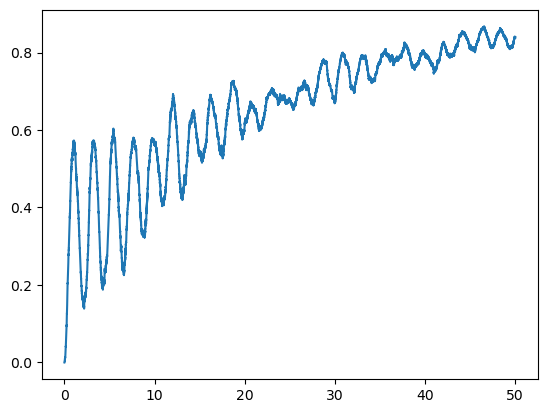

In [8]:
exp_vals = result.expect[0]
plt.plot(t_range, exp_vals)